**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import data 2C_weka.csv for 2 Class Classifcation.


In [309]:
df = pd.read_csv("2Classdata.csv") 

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [310]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [311]:
df.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [312]:
df.shape

(310, 7)

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [314]:
df.groupby('class').size()

class
Abnormal    210
Normal      100
dtype: int64

In [315]:
df.apply(pd.Series.nunique)

pelvic_incidence            310
pelvic_tilt numeric         310
lumbar_lordosis_angle       280
sacral_slope                281
pelvic_radius               310
degree_spondylolisthesis    310
class                         2
dtype: int64

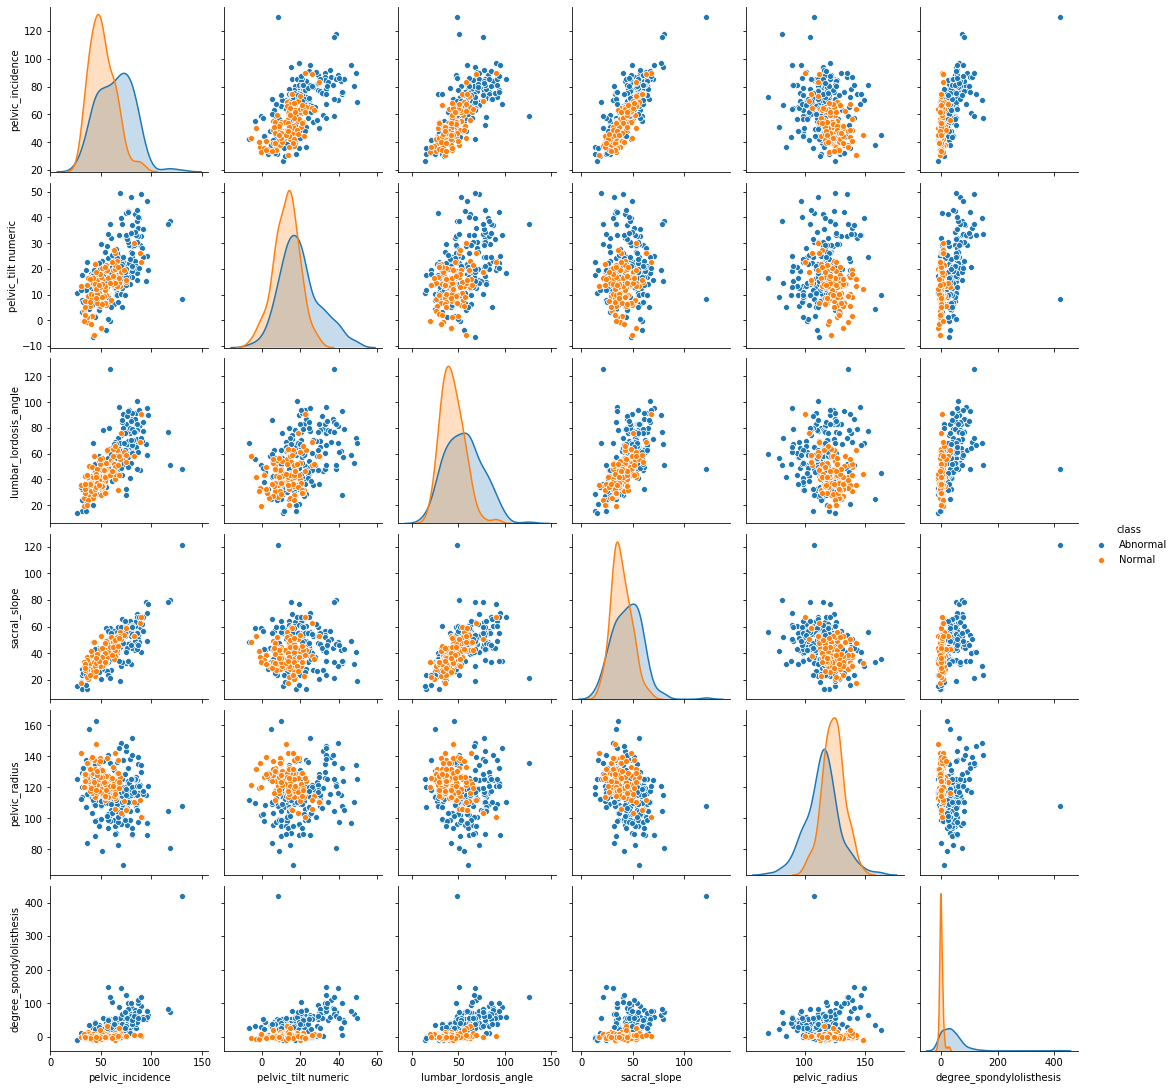

In [316]:
sns.pairplot(df, diag_kind='kde', hue='class')
plt.show()

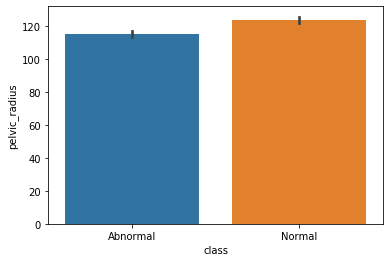

In [317]:
sns.barplot(x=df['class'],y=df.pelvic_radius)

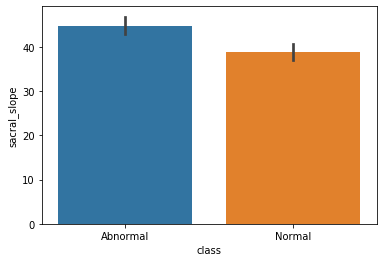

In [318]:
sns.barplot(x=df['class'],y=df.sacral_slope)

# Encode the Class variable to integer.

In [319]:
df.columns.get_loc("class")

6

In [320]:
from sklearn.preprocessing import LabelEncoder

le =LabelEncoder()
df.iloc[:,6]=le.fit_transform(df.iloc[:,6].values)

df.head(3)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [321]:
X = df.iloc[:,0:6].values
type(X)

numpy.ndarray

In [322]:
Y = df.iloc[:,6].values
type(Y)

numpy.ndarray

# Normalize your Data (X) to get values between 0 to 1.

In [323]:
from sklearn.preprocessing import StandardScaler
SC =  StandardScaler()
df.iloc[:,0:6] = SC.fit_transform(df.iloc[:,0:6].values)
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059,0
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556,0
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421,0
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288,0
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106,0


# Split the dat as train and test with a ratio of 70:30.

In [324]:
from sklearn.model_selection import train_test_split

In [325]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [326]:
from sklearn.neighbors import KNeighborsClassifier

K = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', metric='euclidean')
K.fit(X_train,Y_train)
y_pred=K.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0])

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [327]:
K.score(X_test, Y_test)

0.8494623655913979

In [328]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, y_pred)

array([[59,  7],
       [ 7, 20]], dtype=int64)

In [330]:
(59+20)/(59+7+7+20)

0.8494623655913979

In [331]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        66
           1       0.74      0.74      0.74        27

    accuracy                           0.85        93
   macro avg       0.82      0.82      0.82        93
weighted avg       0.85      0.85      0.85        93



# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [332]:
for i in range(3,200,2):
    Knn = KNeighborsClassifier(n_neighbors= i , weights = 'uniform', metric='euclidean' )
    Knn.fit(X_train, Y_train)
    predict = Knn.predict(X_test)
    print("accuracy score with k =", i, "is",Knn.score(X_test, Y_test))
    print(confusion_matrix(Y_test, predict))

accuracy score with k = 3 is 0.8494623655913979
[[59  7]
 [ 7 20]]
accuracy score with k = 5 is 0.8494623655913979
[[59  7]
 [ 7 20]]
accuracy score with k = 7 is 0.8817204301075269
[[60  6]
 [ 5 22]]
accuracy score with k = 9 is 0.8709677419354839
[[58  8]
 [ 4 23]]
accuracy score with k = 11 is 0.8602150537634409
[[57  9]
 [ 4 23]]
accuracy score with k = 13 is 0.8602150537634409
[[58  8]
 [ 5 22]]
accuracy score with k = 15 is 0.8387096774193549
[[56 10]
 [ 5 22]]
accuracy score with k = 17 is 0.8279569892473119
[[56 10]
 [ 6 21]]
accuracy score with k = 19 is 0.8172043010752689
[[55 11]
 [ 6 21]]
accuracy score with k = 21 is 0.8387096774193549
[[56 10]
 [ 5 22]]
accuracy score with k = 23 is 0.8387096774193549
[[56 10]
 [ 5 22]]
accuracy score with k = 25 is 0.8387096774193549
[[56 10]
 [ 5 22]]
accuracy score with k = 27 is 0.8387096774193549
[[56 10]
 [ 5 22]]
accuracy score with k = 29 is 0.8387096774193549
[[56 10]
 [ 5 22]]
accuracy score with k = 31 is 0.8279569892473119
[[5

In [0]:
#  k= 7 and k = 9 , we can see a better model accuracy & better ability to predict abnormality.

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [347]:
df1 = pd.read_csv("3Classdata.csv")

In [348]:
df1.head(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Hernia
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Hernia
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Hernia
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Hernia
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Hernia


In [349]:
df1.tail(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
300,50.676677,6.461501,35.000000,44.215175,116.587970,-0.214711,Normal
301,89.014875,26.075981,69.021259,62.938894,111.481075,6.061508,Normal
302,54.600316,21.488974,29.360216,33.111342,118.343321,-1.471067,Normal
303,34.382299,2.062683,32.390820,32.319617,128.300199,-3.365516,Normal
304,45.075450,12.306951,44.583177,32.768499,147.894637,-8.941709,Normal
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [350]:
df1.shape

(310, 7)

In [351]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [352]:
df1.describe() 

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [353]:
df1.groupby('class').size()

class
Hernia                60
Normal               100
Spondylolisthesis    150
dtype: int64

In [354]:
df1.apply(pd.Series.nunique)

pelvic_incidence            310
pelvic_tilt                 310
lumbar_lordosis_angle       280
sacral_slope                281
pelvic_radius               310
degree_spondylolisthesis    310
class                         3
dtype: int64

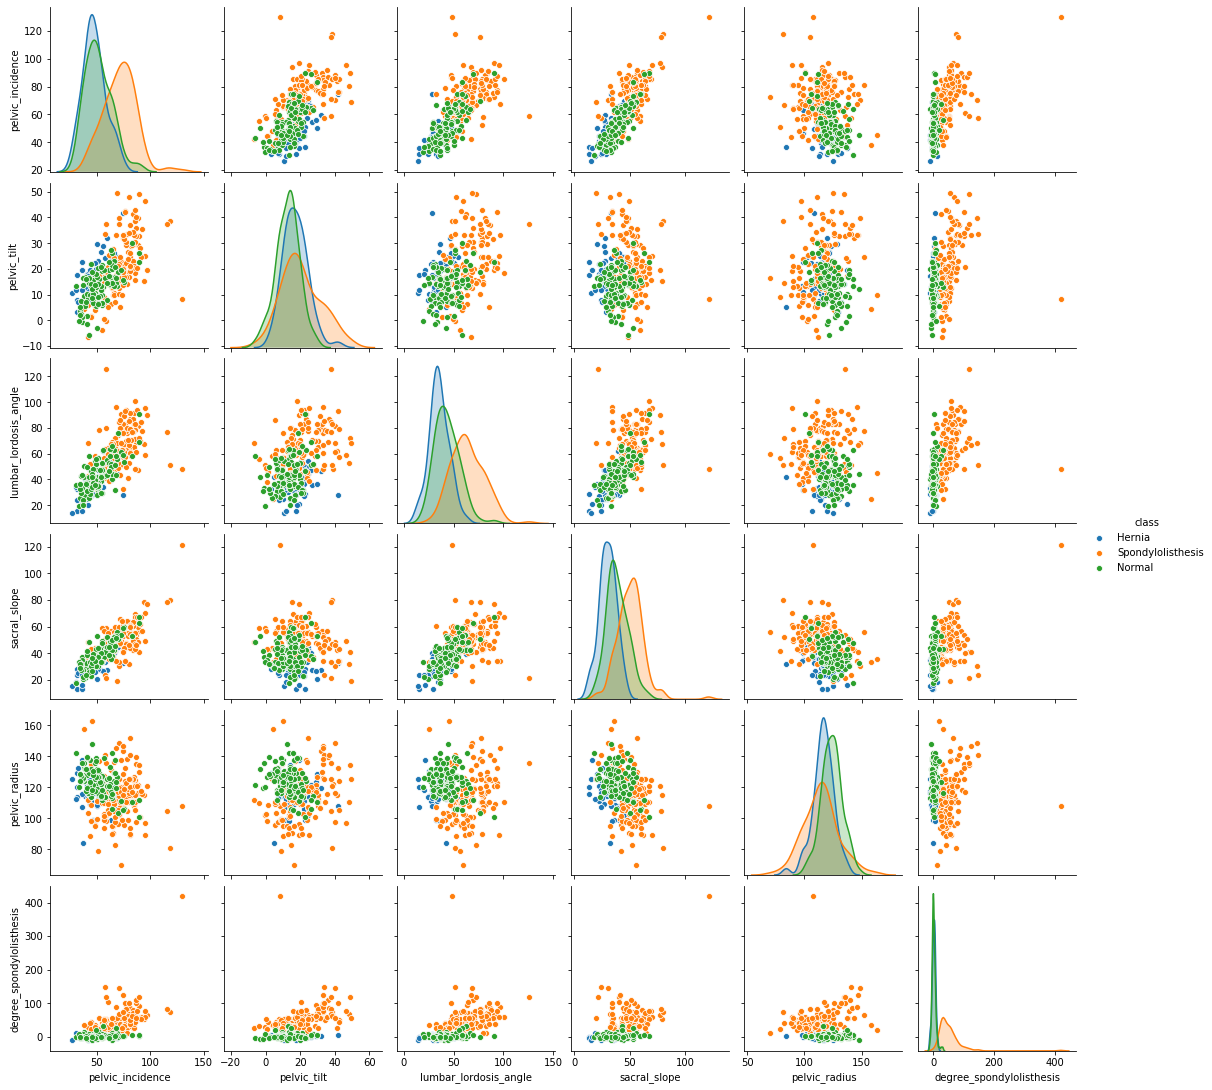

In [355]:
sns.pairplot(df1, diag_kind='kde' , hue = 'class')

In [356]:
df1.iloc[:,6]=le.fit_transform(df1.iloc[:,6].values)
df1.iloc[:,6].value_counts()

2    150
1    100
0     60
Name: class, dtype: int64

In [357]:
X = df1.iloc[:,0:6].values
type(X)

numpy.ndarray

In [358]:
Y = df1.iloc[:,6].values
type(Y)

numpy.ndarray

In [359]:
SC =  StandardScaler()
df1.iloc[:,0:6] = SC.fit_transform(df1.iloc[:,0:6].values)
df1.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059,0
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556,0
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421,0
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288,0
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106,0


In [360]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

In [361]:
K = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', metric='euclidean')
K.fit(X_train,Y_train)
y_pred=K.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 0, 1, 2, 1, 0, 1, 1, 0, 2, 1, 0, 1, 0, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 0, 0,
       1, 0, 1, 1, 1, 1, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2,
       1, 0, 1, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 1,
       2, 1, 1, 1, 2])

In [362]:
K.score(X_test, Y_test)

0.8279569892473119

In [363]:
confusion_matrix(Y_test, y_pred)

array([[10,  7,  0],
       [ 6, 27,  0],
       [ 1,  2, 40]], dtype=int64)

In [364]:
(10+27+40)/(10+7+0+6+27+0+1+2+40)

0.8279569892473119

In [365]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59        17
           1       0.75      0.82      0.78        33
           2       1.00      0.93      0.96        43

    accuracy                           0.83        93
   macro avg       0.78      0.78      0.78        93
weighted avg       0.84      0.83      0.83        93



In [366]:
for i in range(3,200,2):
    Kn = KNeighborsClassifier(n_neighbors= i , weights = 'uniform', metric='euclidean' )
    Kn.fit(X_train, Y_train)
    predict = Kn.predict(X_test)
    print("accuracy score with k =", i, "is",Kn.score(X_test, Y_test))
    print(confusion_matrix(Y_test, predict))

accuracy score with k = 3 is 0.8279569892473119
[[10  7  0]
 [ 6 27  0]
 [ 1  2 40]]
accuracy score with k = 5 is 0.8279569892473119
[[ 9  8  0]
 [ 7 26  0]
 [ 0  1 42]]
accuracy score with k = 7 is 0.8494623655913979
[[10  7  0]
 [ 5 28  0]
 [ 1  1 41]]
accuracy score with k = 9 is 0.8602150537634409
[[12  5  0]
 [ 6 27  0]
 [ 1  1 41]]
accuracy score with k = 11 is 0.8387096774193549
[[11  6  0]
 [ 7 26  0]
 [ 1  1 41]]
accuracy score with k = 13 is 0.8602150537634409
[[11  6  0]
 [ 5 28  0]
 [ 1  1 41]]
accuracy score with k = 15 is 0.8494623655913979
[[10  7  0]
 [ 5 28  0]
 [ 1  1 41]]
accuracy score with k = 17 is 0.8924731182795699
[[12  5  0]
 [ 4 29  0]
 [ 0  1 42]]
accuracy score with k = 19 is 0.8602150537634409
[[10  7  0]
 [ 4 29  0]
 [ 0  2 41]]
accuracy score with k = 21 is 0.8602150537634409
[[10  7  0]
 [ 4 29  0]
 [ 0  2 41]]
accuracy score with k = 23 is 0.8709677419354839
[[11  6  0]
 [ 4 29  0]
 [ 1  1 41]]
accuracy score with k = 25 is 0.8602150537634409
[[11  6  

In [289]:
#  k= 17 and k = 33 we can see a better model accuracy & better ability to predict abnormality.